# Titanic Data Analysis using visualization

### Objective
Let us explore the Titanic dataset by performing data analysis using visualization.
We will implement different plots supported by matplotlib and seaborn on the titanic data and derive some meaningful insights.

### Dataset - Titanic data
### Dataset source: https://www.kaggle.com/datasets/brendan45774/test-file
### Attribute Information
- Survived: Outcome of survival (0 = No; 1 = Yes)
- Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- Name: Name of passenger
- Sex: Sex of the passenger
- Age: Age of the passenger (Some entries contain NaN)
- SibSp: Number of siblings and spouses of the passenger aboard
- Parch: Number of parents and children of the passenger aboard
- Ticket: Ticket number of the passenger
- Fare: Fare paid by the passenger
- Cabin: Cabin number of the passenger (Some entries contain NaN)
- Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

### Table of Content
1. Basic data exploration
2. Basic Plots in matplotlib
   - Bar Plot
   - Scatter Plot
3. Statistical Plots in matplotlib
   - Hist Plot
   - Pie Plot
   - Box Plot
4. Distribution Plot in Seaborn
    - displot
5. Categorical Plots in Seaborn
    - countplot
    - catplot
6. Relational Plots in Seaborn
    - relplot  
7. Multiple grid in Seaborn   
    - facetgrid
    - Pairplot

## Import required libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style ="ticks")
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [ ]:
#titanic_df = pd.read_csv('titanic_train.csv')
#titanic_df.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
titanic_df = pd.read_csv('/content/drive/MyDrive/titanic_train.csv')
titanic_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Explore the data

In [ ]:
## Check basic information about the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df['PassengerId'].nunique()

891

#### Inferences 
- There are 891 entries and 11 columns
- There are a few object type columns
- There are null values in the columns 'age', 'Cabin', and 'Embarked'.
- PassengerId is the unique identifier.

In [ ]:
## dropping passenger_id
titanic_df.drop('PassengerId',axis=1,inplace=True)

In [ ]:
## Check the statistical summary of the data
titanic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
titanic_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


- The maximum fare paid by the passenger is around 500.
- We can see that there are 147 unique categories in the column Cabin.
- 3 unique categories in the column Embarked and the most frequent is S(southampton).

## 2. Basic plots in Matplotlib library

### Question 1. From which port the maximum number of people boarded the titanic? Use an appropriate plot.

#### 2.1 Bar Plots
- Barplot helps to understand and compare the data distribution of different levels in a variable
- Creates the levels of the data with rectangular bars with lengths and heights that is equivalent to the values which they represent.
- The bars can be plotted horizontally or vertically

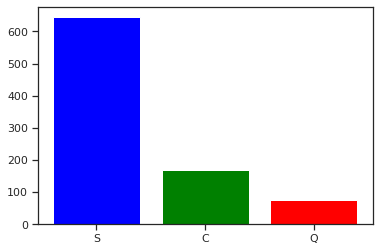

In [ ]:
embarked = titanic_df['Embarked'].value_counts()
plt.bar(x=embarked.index, height=embarked.values,color=['blue', 'green', 'red']);

- From the above plot we can say that the maximum people embarked the titanic were from Southampton.
- The next port being Cherbourg and then Queenstown.

### Question 2. Visualize the relationship between ticket fare paid and age of the passengers using scatter plot and write your inferences.

#### 2.2 Scatter Plots
- Scatterplot is a classic and most commonly used plot to study the relationship between two random variables
- It helps to understand the correlation between the variables 

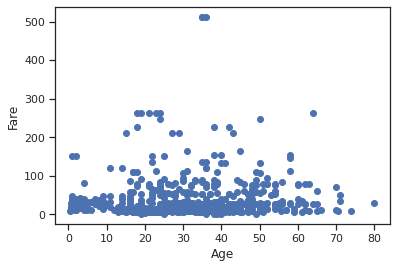

In [ ]:
age = titanic_df['Age']
fare = titanic_df['Fare']
plt.xlabel("Age")
plt.ylabel("Fare")
plt.scatter(x=age, y=fare);

- Many of the points overlap, especially where fare is around ~ 75 pounds and age is less than 55 years.
- From the plot it is evident that the fare is too less, so we can say that a large portion of the passengers belong to third class(third class ticket is of less fare).

## 3. Statistical plots in matplotlib

### Question 3. Check the distribution of age of the passengers using Histplot.

#### 3.1 Histplot
- Histoplot helps in visualizing the discrete or continuous data
- It divides the entire range of data into a series of intervals(bins) and then represents the count of values in those intervals 

Text(0.5, 1.0, 'Distribution of Passengers Ages')

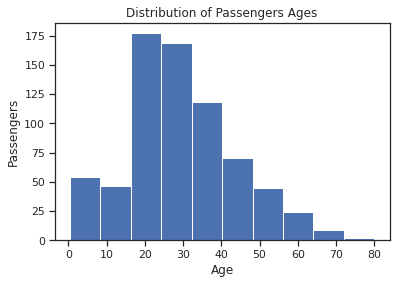

In [ ]:
# We can add titles, labels, and gridlines to make it more readable.
ages = titanic_df['Age']
plt.hist(ages)
plt.xlabel('Age')
plt.ylabel('Passengers')
plt.title('Distribution of Passengers Ages')

- The age ranges from 2- 80 years. 
- We can observe that majority of the passengers were between the age of 20 - 45 years.

### Question 4. Check the percentage of the male and female passengers boarded the titanic.


#### 3.2 Pie Plot
- Pieplot is a circular statistical plot.
- It is divided into slices to represent the different categorical levels.
- It displays the percentage of observations of the different category level in a variable.

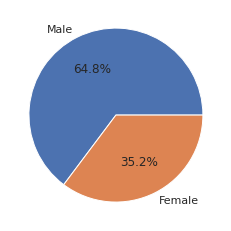

In [ ]:
x = titanic_df['Sex'].value_counts()
# we can display the percentage that each slice represents using the autopct parameter by setting it to a format specifier.
plt.pie(x, labels=['Male', 'Female'], autopct='%.1f%%'); 

- From the Pie Plot it is clear that there were almost 65% male passengers and around 35% female passengers.
- Similarly we can analyse other categorical features as well

### Question 5. Check the statistical summary of the column 'Fare' using Boxplot and write your findings.

#### 3.3 Box Plots
- Boxplot helps in visualizing the data distribution of a variable 
- Box plots are important in statistical analysis because they let you see the distrubution of a data set at a glance, including outliers. 

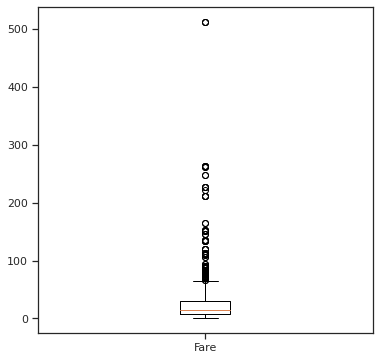

In [ ]:
fare = titanic_df['Fare']
fig = plt.figure(figsize=(6, 6))
plt.boxplot(fare, labels=['Fare']);

- We can pick a few key datapoints off the boxplot at a glance. 
- The maximum fare paid by a passenger is around 500 and the minimum is 0.
- The median value of the fare amount is around 14.
- The entire distribution of column fare is around 0 to 500, and there are many data points at the high end of the scale considered as outliers.

## 4. Distribution Plots in Seaborn

### Question 6. Visualize the column age of passengers using displot.

#### 4.1 displot
- Displot helps in understanding the variation in the data distribution. 
- It also provides access to several approaches for visualizing the distribution of data.
- histplot() is the default kind of plot when displot() function is called.
- KDE is the kernel Density Estimator and can be plotted by specifying the parameter kde="true".

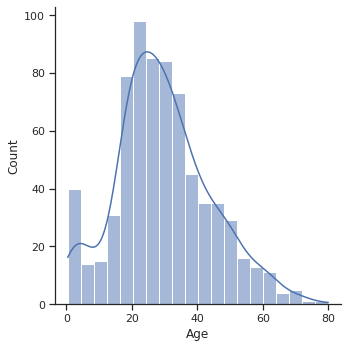

In [ ]:
sns.displot(titanic_df['Age'], kde=True)
plt.show()

- From the above plot we can see that maximum population of the people has an age between 20-38 years.
- The KDE graph shows the Probability Distribution of data values as the area under the plotted curve.

## 5. Categorical Plots in Seaborn

### Question 7. Count the number of passengers in different classes using appropriate plot.

#### 5.1 countplot
- Countplot displays the number of observations in each categorical level using the bars.
- It is Similar to bar plot.
- The count plots can be plotted horizontally or vertically.

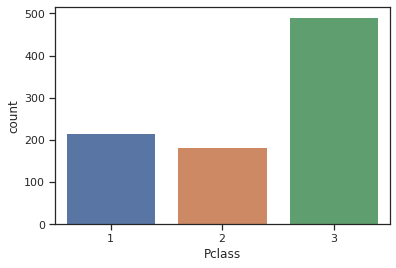

In [ ]:
sns.countplot(x='Pclass', data=titanic_df)
plt.show()

- It can be clearly observed that there were almost 500 passengers from Class 3.
- Around 180 passengers from class 2.
- And almost 210 passengers from Class 1. 

### Question 8. Visualize the survival rate both is males and females using catplot and write your inferences.

#### 5.2 catplot()
- Catplot helps to visualise the categorical data much efficiently. 
- It can be used for analysis between categorical features and a numerical feature.
- Can be used to plot multiple plots like count, box, strip, swarm by changing the ‘kind’ argument 

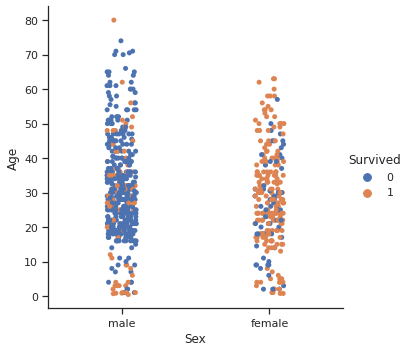

In [ ]:
#Example 1 kind=strip plot
sns.catplot(x="Sex",y="Age",data=titanic_df,kind="strip", hue="Survived")
plt.show()

- From the plot we can observe more number of female passengers survived as compared to male passengers.
- In strip plot all the data points are gathered in a strip form we can use swarm plot for better understanding of each data point for the following analysis.

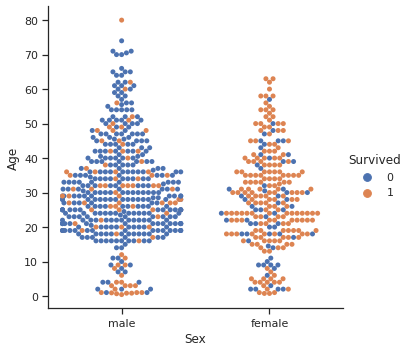

In [ ]:
#Example 2 kind=swarm plot
sns.catplot(x="Sex",y="Age",data=titanic_df,kind="swarm", hue="Survived")
plt.show()

- Fromt the plot it is evident that the ratio of surviving males is less than the ratio of surviving females. 
- As for the male plot, there are more blue points and less orange points. 
- On the other hand, for females, there are more orange points (surviving) than the blue points (not surviving).
- Hence using swarm plot gave more scattered data points and a better understanding of the analysis.

## 6. Relational Plots in Seaborn

### Question 9. Check the distribution of the males and females among different ticket classes.

#### relplot()
- Relplot helps to understand the complicated comparisons much easier. 
- It can be used for analysis between categorical features and a numerical feature.
- By default the type of the plot is scatterplot() .We can change the type of the plot by changing the ‘kind’ parameter.

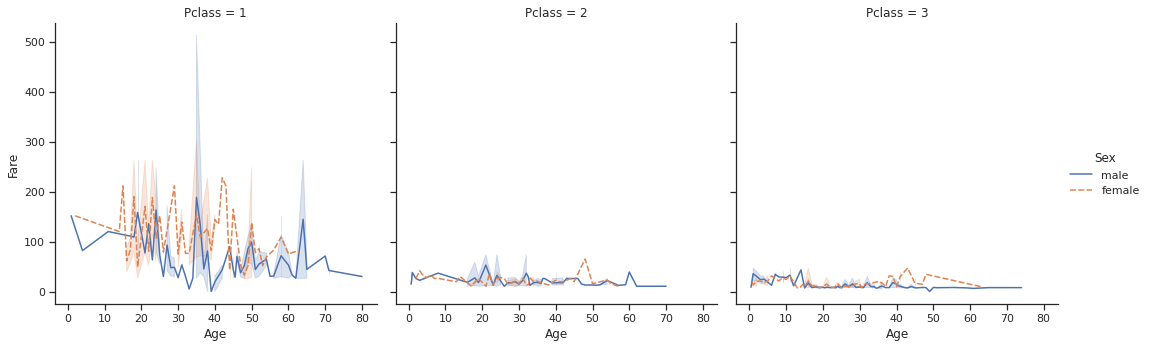

In [ ]:
#Example 1 kind= line plot
sns.relplot(x="Age", y="Fare", col="Pclass",
            hue="Sex", style="Sex",
            kind="line", data=titanic_df)
plt.show()

- It can be observed that the fare paid by the passengers is higher for Pclass=1 compare to the 2nd and 3rd class.
- And the ratio of women to men is more in 1st class.
- Both 2nd Class and 3rd Class had almost equal number of men and women.

### Question 10. Visualize and analyse the relationship between Ticket classes, Survivial rate, and Gender of the passengers using appropriate plot

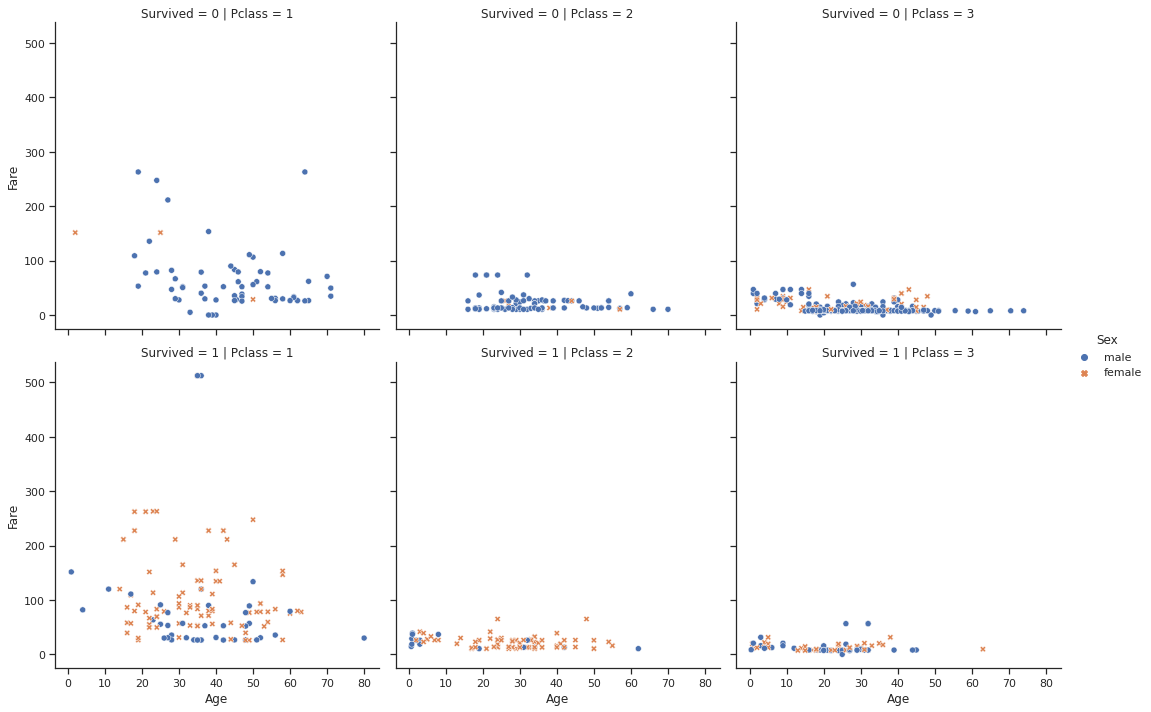

In [ ]:
# Example 2 kind= scatter plot
sns.relplot(x="Age", y="Fare", col="Pclass",
            hue="Sex", style="Sex",row="Survived",
            kind="scatter", data=titanic_df)
plt.show()

- It is evident from the graph that majority of the male died irrespective of the ticket classes.
- Women belonging to anyone of the classes had the higher chance of survival as compared to men.

## 7. Multiple Grid in Seaborn

### Question 11. Check the death rate with respect to age of the passengers and three different ticket classes

#### 7.1 facetgrid()
- Creates multiple instances of the same plot on different subsets of the data. Input data must be in a dataframe format
- Facet grid forms a matrix of panels defined by row and column by dividing the variables. 
- Due to these panels, a single plot looks like multiple plots. 
- It is very helpful to analyze all combinations in two discrete variables.

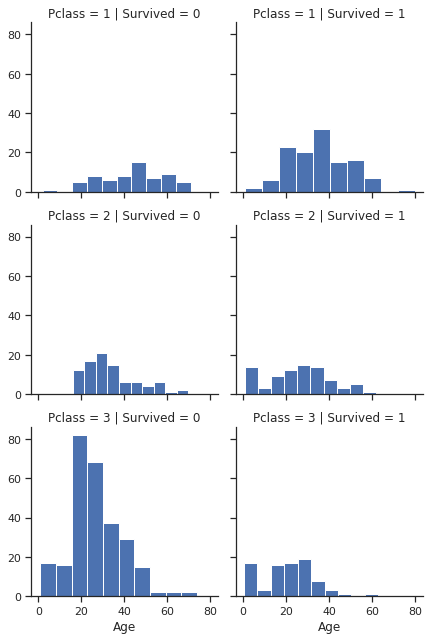

In [ ]:
# initialize the FacetGrid object
g = sns.FacetGrid(titanic_df, col='Survived', row='Pclass')
g.map(plt.hist, 'Age')
g.add_legend()
plt.show()

- From the above graph it can be observed that a lot of people died from 3rd class ticket and most of them were having age between 20-45.
- The least people who died were from 1st class ticket.

### Question 12. Visualize the multiple pairwise bivariate distribution using appropriate plot and write your inferences.


#### 7.2 pairplot()
- Creates an axis grid and each variable is represented on y-axis and x- axis
- Pairwise relationship is represented through scatter plots
- Distribution is shown through displot
- Unlike FacetGrid, it uses different pair of variable for each subplot.

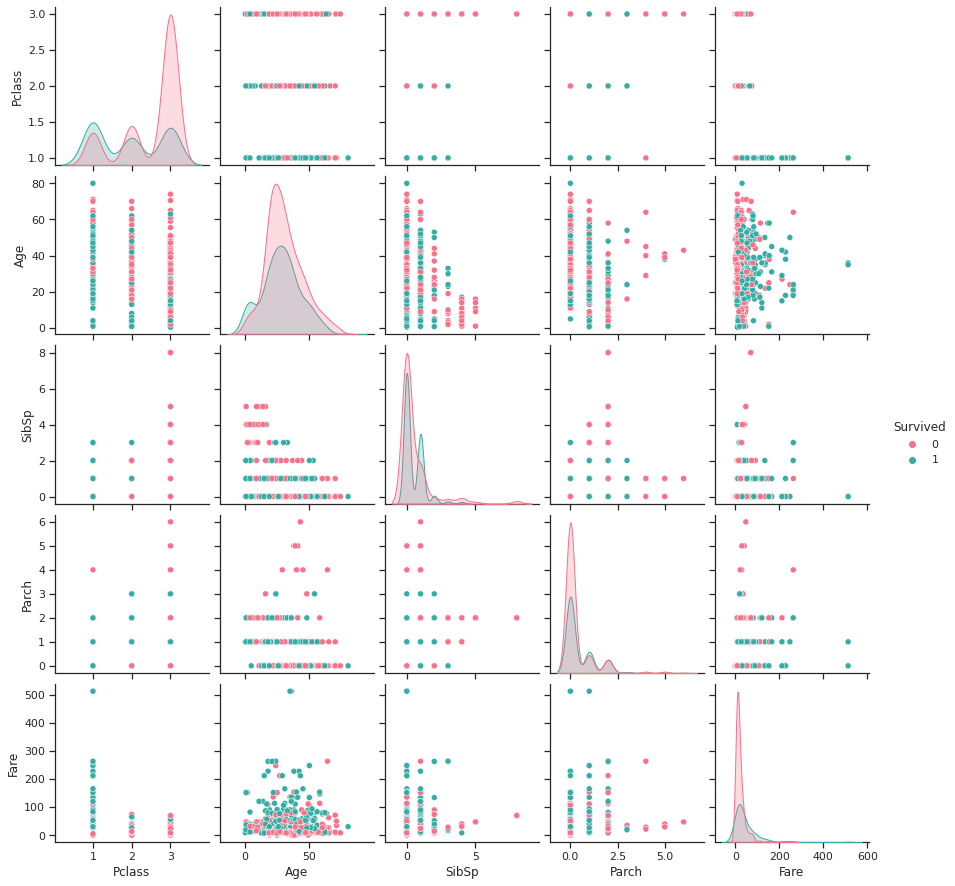

In [ ]:
sns.pairplot(titanic_df, hue='Survived', kind="scatter", palette="husl")
plt.show()

- By pairplot we can inspect the relationship of target variable 'Survived'.
- Its evident that a lot of passengers with high age did not survive the disaster.
- Poeple belonging to 1st class had a higher percentage of survival rate as compared to people belonging to 2nd or 3rd class.

----------
### Happing Learning :)
---------